In [ ]:
# decision trees from convnet

In [2]:
# http://scikit-learn.org/stable/tutorial/machine_learning_map/
import os
import numpy as np

PATH_TO_DATA = "../architecture/feature-maps/"
# example
# DF_MAP = "example_dfmap"
# LABELS = "example_imgLabels"

# real
DF_MAP = "VGG16-dfmap"
DF_MAP_PCA = "VGG16-dfmap-PCA"
LABELS = "VGG16-imgLabels"

In [3]:
# with open("filename.pkl", "wb") as f:
#     pickle.dump(dictname, f)
# ...
# with open("filename.pkl", "rb") as f:
#     dictname = pickle.load(f)

# open the files
import pickle

features = pickle.load(open(os.path.join(PATH_TO_DATA,DF_MAP),'rb')) # first without PCA technique
labels = pickle.load(open(os.path.join(PATH_TO_DATA,LABELS),'rb'))

In [22]:
# tuple to np.array ? this is mandatory ? check it out

features_array = np.array(features)
labels_array = np.array(labels)

# print(type(features_array))
# print()
# print(features_array.shape)
# print()
# print(features_array)

In [23]:
# from sklearn.model_selection import train_test_split
# cross validation
# change test size, X train x test Y train y test check features_array has the correct dim otherwise .Transpose
# X, x, Y, y = cross_validation.train_test_split(features_array, labels, test_size=0.2, random_state=42)
# https://stackoverflow.com/questions/43302400/deprecation-warnings-from-sklearn

##########################################
##########################################

# crossvalidation?? new version!!!

from sklearn.model_selection import train_test_split
# change test size, X train x test Y train y test check features_array has the correct dim otherwise .Transpose

# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = \
train_test_split(features_array, labels_array, test_size=0.2, random_state=42)



In [15]:
x_train.shape

(4000, 4096)

In [24]:
print("train")
print("x",type(x_train))
print("x",x_train.shape)
print()
print("y",type(y_train))
print("y",y_train.shape)
print()
print()
print("test")
print("x",type(x_test))
print("x",x_test.shape)
print()
print("y",type(y_test))
print("y",y_test.shape)

train
x <class 'numpy.ndarray'>
x (4000, 4096)

y <class 'numpy.ndarray'>
y (4000,)


test
x <class 'numpy.ndarray'>
x (1000, 4096)

y <class 'numpy.ndarray'>
y (1000,)


In [25]:
# Decision Tree Classifer
from sklearn.tree import DecisionTreeClassifier

# model definition
DTC = DecisionTreeClassifier()

# model training
DTC.fit(x_train, y_train)

# model predict
y_pred = DTC.predict(x_test)


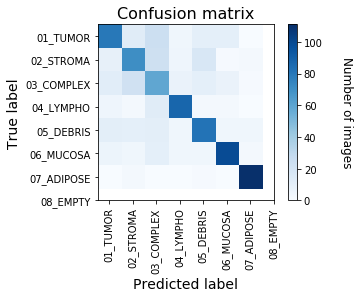

In [29]:
# Decision Tree without PCA - confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def DTC_NO_PCA_CM(y_true,y_pred):
    
    # confusion matrix
    CM = confusion_matrix(y_true,y_pred)
    
    # image's categories
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    
    # color pallete
    plt.imshow(CM[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.title("Confusion matrix", fontsize=16)
    
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    
    plt.tight_layout()
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

DTC_NO_PCA_CM(y_test,y_pred)


In [30]:
# metrics
from sklearn.metrics import accuracy_score

print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 71.1%


In [ ]:
# decision trees + pca dim reduc

In [31]:
# open the files
import pickle

features = pickle.load(open(os.path.join(PATH_TO_DATA,DF_MAP_PCA),'rb')) # first without PCA technique
labels = pickle.load(open(os.path.join(PATH_TO_DATA,LABELS),'rb'))

In [32]:
features_array = np.array(features)
labels_array = np.array(labels)

In [33]:
from sklearn.model_selection import train_test_split
# change test size, X train x test Y train y test check features_array has the correct dim otherwise .Transpose

# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = \
train_test_split(features_array, labels_array, test_size=0.2, random_state=42)



In [34]:
print("train")
print("x",type(x_train))
print("x",x_train.shape)
print()
print("y",type(y_train))
print("y",y_train.shape)
print()
print()
print("test")
print("x",type(x_test))
print("x",x_test.shape)
print()
print("y",type(y_test))
print("y",y_test.shape)

train
x <class 'numpy.ndarray'>
x (4000, 800)

y <class 'numpy.ndarray'>
y (4000,)


test
x <class 'numpy.ndarray'>
x (1000, 800)

y <class 'numpy.ndarray'>
y (1000,)


In [35]:
# Decision Tree Classifer
from sklearn.tree import DecisionTreeClassifier

# model definition
DTC = DecisionTreeClassifier()

# model training
DTC.fit(x_train, y_train)

# model predict
y_pred = DTC.predict(x_test)

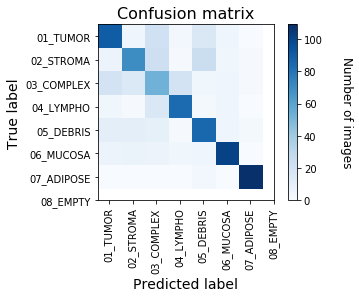

In [36]:
# Decision Tree without PCA - confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

def DTC_PCA_CM(y_true,y_pred):
    
    # confusion matrix
    CM = confusion_matrix(y_true,y_pred)
    
    # image's categories
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    
    # color pallete
    plt.imshow(CM[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    
    plt.title("Confusion matrix", fontsize=16)
    
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    
    plt.tight_layout()
    
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

DTC_PCA_CM(y_test,y_pred)

In [37]:
# metrics
from sklearn.metrics import accuracy_score

print("Accuracy: {0:0.1f}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy: 71.9%


In [ ]:
# # cross validation + grid search 
# from sklearn import tree
# from sklearn import grid_search as gs# in order to avoid more code

# DT_NO_CPA = gs.GridSearchCV(tree.DecisionTreeClassifier())

# # DT_NO_CPA.fit(X=x, y=y)
# # tree_model = clf.best_estimator_
# # print (clf.best_score_, clf.best_params_) 

# model
# http://scikit-learn.org/stable/modules/tree.html
# result eval
# http://scikit-learn.org/stable/modules/model_evaluation.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
import sklearn.metrics